# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [118]:
df = pd.read_csv('../data/states_edu.csv')

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [123]:
df['GRADES_ALL_G'] = df['GRADES_ALL_G'].fillna(df["GRADES_PK_G"]+df["GRADES_1_8_G"]+df["GRADES_9_12_G"])
df["ENROLL"] = df["ENROLL"].fillna(df["GRADES_ALL_G"])

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: Grade 8 Math

How many years of data are logged in our dataset? 

In [124]:
years = df["YEAR"].values
years.sort()
years_of_data = years[years.size -1] - years[0]
print(years_of_data)

33


Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [125]:
states = df.groupby('STATE')
states_mean = states.mean()
ohio = states_mean.loc["OHIO", "AVG_READING_8_SCORE"]
michigan = states_mean.loc["MICHIGAN", "AVG_READING_8_SCORE"]
if(michigan > ohio):
    print("Michigan")
elif (michigan < ohio):
    print("Ohio")
else:
    print("Tie!")


Ohio


Find the average for your outcome score across all states in 2019

In [126]:
average_math_scores = df.groupby("STATE")["AVG_MATH_8_SCORE"].mean().reset_index()
average_math_scores.columns = ["STATE","AVG_MATH_8_SCORE"]
print(average_math_scores["AVG_MATH_8_SCORE"].mean())

278.5171248039172


Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [127]:
max_math_scores = df.groupby("STATE")["AVG_MATH_8_SCORE"].max()
max_math_scores.columns = ["STATE", "MAX_AVG_MATH_8_SCORE"]
max_math_scores

STATE
ALABAMA                 269.0
ALASKA                  283.0
ARIZONA                 283.0
ARKANSAS                279.0
CALIFORNIA              277.0
COLORADO                292.0
CONNECTICUT             289.0
DELAWARE                284.0
DISTRICT_OF_COLUMBIA    269.0
DODEA                   293.0
FLORIDA                 281.0
GEORGIA                 281.0
HAWAII                  281.0
IDAHO                   287.0
ILLINOIS                285.0
INDIANA                 288.0
IOWA                    286.0
KANSAS                  290.0
KENTUCKY                282.0
LOUISIANA               273.0
MAINE                   289.0
MARYLAND                288.0
MASSACHUSETTS           301.0
MICHIGAN                280.0
MINNESOTA               295.0
MISSISSIPPI             274.0
MISSOURI                286.0
MONTANA                 293.0
NATIONAL                285.0
NEBRASKA                288.0
NEVADA                  278.0
NEW_HAMPSHIRE           296.0
NEW_JERSEY              296.0
NEW_

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [133]:
#creates a new feature that measures the school's expenditure per student
df["Expenditure per student"] = df["TOTAL_EXPENDITURE"]/df["GRADES_ALL_G"]

# creates a new feature that measures the 8th grade population in terms of the total primary school education
df["ENROLL_8"] = df["GRADES_8_G"]/df['GRADES_ALL_G'];

Feature engineering justification: **< I created two features, expenditure per student and enroll_8. I agree with the assumption stated in the example that the state's expenditure per student may affect their overall academic performance. Additionally, I also think that the proportion of students that are in 8th grade out of the entire school may also play a role. If 8th graders are the largest class in the school, then they might not receive the best instruction, which would affect their Grade 8 Math scores.\>**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

<AxesSubplot:xlabel='AVG_MATH_4_SCORE', ylabel='AVG_MATH_8_SCORE'>

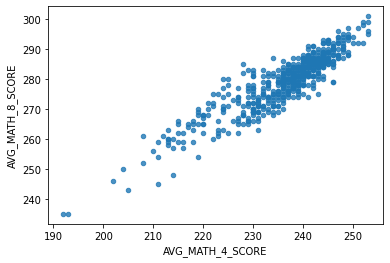

In [134]:
df.plot.scatter(x='AVG_MATH_4_SCORE', y='AVG_MATH_8_SCORE', alpha=0.8)

**<Math 8 score vs Math 4 Score>** As shown by the dotplot, there is a strong positive linear relationship between AVG_MATH_4_SCORE and AVG_MATH_8 SCORE.

**Visualization 2**

<AxesSubplot:xlabel='ENROLL_8', ylabel='AVG_MATH_8_SCORE'>

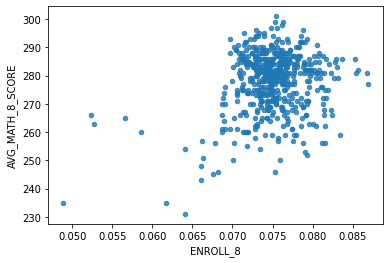

In [157]:
df.plot.scatter(x='ENROLL_8', y='AVG_MATH_8_SCORE', alpha=0.8)

**<Math 8 score vs proportion of 8th graders in state>** There is a strong positive linear relationship being shown. 

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [146]:
from sklearn.model_selection import train_test_split

In [158]:
#I decided to train on all the data since I wanted to see if the features were general enough to apply to all students
X = df[["Expenditure per student", "ENROLL_8", "AVG_MATH_4_SCORE"]].dropna()
y = df.loc[X.index]["AVG_MATH_8_SCORE"]
y.fillna(y.median(), inplace=True)

In [148]:
#Splits data into default 70/30 training testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [149]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [150]:
# create your model here
model = LinearRegression()

In [151]:
model.fit(X_train, y_train)

LinearRegression()

In [152]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [153]:
print(model.intercept_)
print(model.coef_)
model.score(X_test, y_test)

46.9798716024946
[-0.13478518 27.25765203  0.98075131]


0.8484442756533477

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

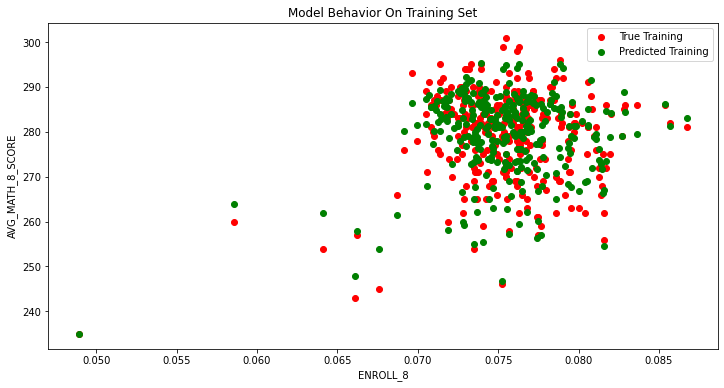

In [154]:
col_name = 'ENROLL_8'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('AVG_MATH_8_SCORE')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

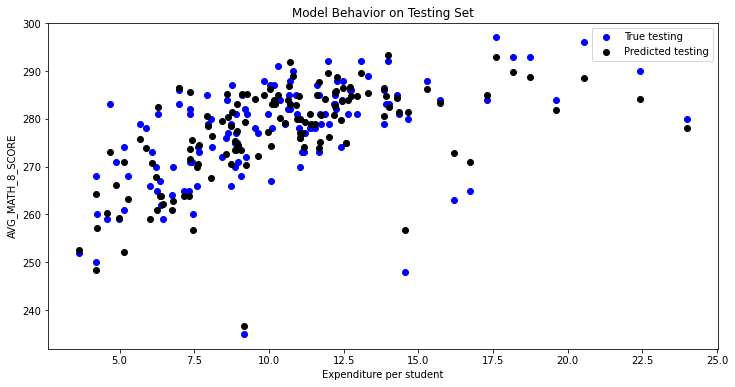

In [155]:
col_name = "Expenditure per student"

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('AVG_MATH_8_SCORE')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

**<I decided to train my model to predict the average math scores for 8th graders. To do so, I picked three features: the average math scores for 4th graders, the proportion of 8th graders in the state, and the expenditure schools spend on a student. I used these features because I believed that math scores from younger students in the same state would indicate the scores of older students, the proportion of eighth graders would affect the instruction quality, and the average expenditure per student would affect the overall education quality. After plotting the average math scores against the features and training the regression model, I found that the average math scores for 4th graders and the expenditure schools spend on a student had a strong positive relationship with the average math scores. Additionally, the R^2 value of the prediction was 0.848, meaning that the model's overall performance was decent. Improving future predictions would require gathering more data and splitting students into groups. For instance, each student in a different state should receive their predictions, and getting factors like the teacher-student ratio would greatly help with accuracy. \>**